In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import json
import re

review_count = 0

with open("/content/drive/MyDrive/Wordcloud/first_10k_5_star.json", 'r', encoding='utf-8') as restaurant_fd:
    data = json.loads(restaurant_fd.read())
    onestar_array  = []
    for review in data:
        onestar_array.append(review["text"])
    #print(onestar_array)

restaurant_fd.close()

   

In [21]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#Data Tokenization and Lemmentazitaion (not used here)
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
onestar_array_token = []
onestar_array_lemma = []

for i in onestar_array:
   word_list = nltk.word_tokenize(i)
   onestar_array_token.append(word_list)

for review_list in onestar_array_token:
  for w in review_list:
    onestar_array_lemma.append(lemmatizer.lemmatize(w))


#print(onestar_array_token)
#print(onestar_array_lemma)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


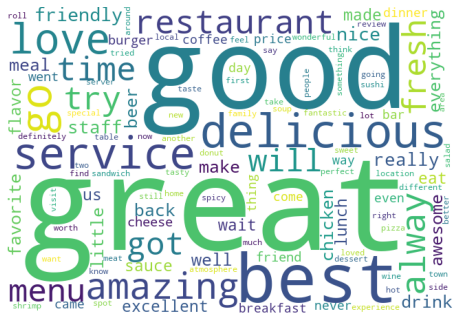

In [24]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS)
    stopword_list.add("food")
    stopword_list.add("place")
    stopword_list.add("order")
    stopword_list.add("ordered")
    stopword_list.add("one")
    stopword_list.add("u")
    #print(stopword_list)

    # Create WordCloud 
    word_cloud = WordCloud(width = 650, height = 450, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()
    
paragraph=' '.join(onestar_array)
word_cloud(paragraph)